This is a first visualization test!

In [1]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
result_files = glob.glob('data/' + 'results*.json')

Show results for different machines

In [3]:
results = {}
for file in result_files:
    sysname = file.split('_')[-1].split('.')[0]
    with open(file, "r") as read_file:
        results[sysname] = json.load(read_file)

In [4]:
filter_list = [(min, {'name': 'matmul_np', 'params_n': 1000, 'params_m': 1000, 'params_dtype': 'float64'}),
               (min, {'name': 'matmul_sp', 'params_n': 1000, 'params_m': 1000, 'params_density': 0.01}),
               (min, {'name': 'monte_carlo', 'params_nsamples': 100000, 'params_type': 'numba'}),
               (max, {'name': 'import', 'params_modules': 'numpy, scipy, mpi4py'}),
               (max, {'name': 'numpy_output', 'params_n3d': 512, 'params_noise_level': 0.0, 'params_compressed': True}),
               (max, {'name': 'numpy_input', 'params_n3d': 512, 'params_compressed': True}),
               (max, {'name': 'mpi_broadcast', 'params_n': 100000, 'params_dtype': 'float64'})]

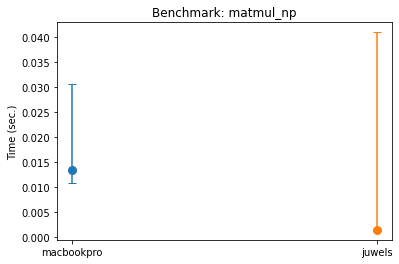

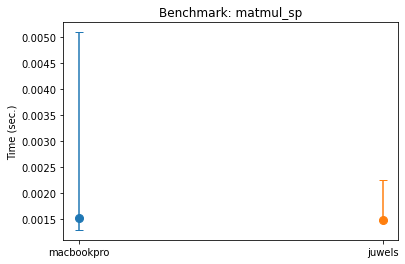

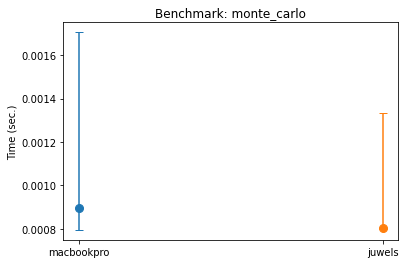

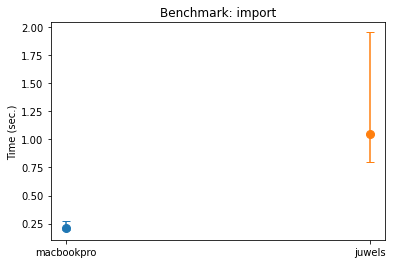

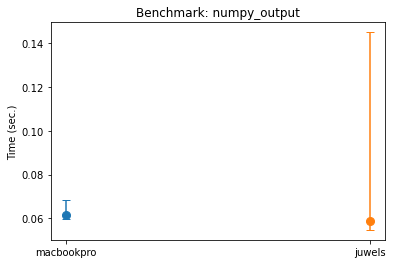

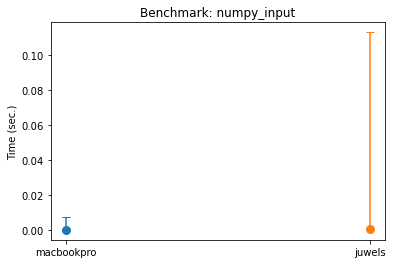

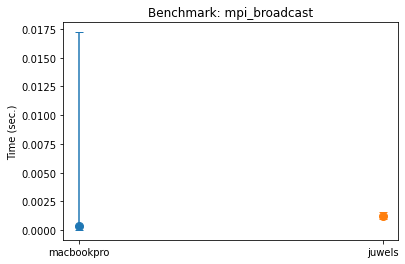

In [5]:
for filter in filter_list:
    fig = plt.figure()
    for k, list_of_machine_results in results.items():
        seq = [(v['mean_duration'], v['min_duration'], v['max_duration']) for v in list_of_machine_results if filter[1].items() <= v.items()]
        best_run = filter[0](seq, key = lambda t: t[0])
        errors = [[best_run[0]-best_run[1]], [best_run[2]-best_run[0]]]
        plt.errorbar([k], [best_run[1]], yerr=errors, capsize=4, markersize=8, fmt='-o')
    plt.title(f'Benchmark: {filter[1]["name"]}')
    plt.ylabel('Time (sec.)')